In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde 
from analytical import sound_hard_circle


#dde.config.set_default_float('float64')
#dde.config.set_default_float('float64')
dde.config.set_default_float('float32')


'''                        Problem parameters                               '''
k0 = 1           # wavenumber
# 5 is fine!
# 8 is more or less ok. ¿Add more points?
# Added more points, but not really ok with just 20.000 iterations + BFGS
# Change the learning rate? 
# Avec8 et 15 points, learning rate = 0.05, n'arrive pas a apprendre l'interieur...

wave_len = 2*np.pi / k0  # wavelength

dim_x = 2 * np.pi
n_wave = 20

# The mesh element size is h_elem
h_elem = wave_len / n_wave

nx = int(dim_x / h_elem)
print(h_elem, 'h_elem')
print( nx, 'nx')
print(nx **2, 'nx**2')

Using backend: tensorflow.compat.v1

2021-10-27 14:22:18.539091: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term

Set the default float type to float32
0.3141592653589793 h_elem
20 nx
400 nx**2


Compiling model...
Building feed-forward neural network...
'build' took 0.044642 s



/opt/conda/envs/DL/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/opt/conda/envs/DL/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-10-27 14:22:20.250805: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-27 14:22:20.357716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.46GiB deviceMemoryBandwidth: 625.94GiB/s
2021-10-27 14:

'compile' took 0.791270 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.61e-01, 1.34e-01, 9.21e+01, 8.32e+01]    [2.48e-01, 1.28e-01, 9.21e+01, 8.32e+01]    [1.23e+00]    


2021-10-27 14:22:21.023415: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000205000 Hz


1000      [1.50e-01, 6.08e-02, 1.91e-03, 1.91e-03]    [1.36e-01, 4.56e-02, 1.91e-03, 1.91e-03]    [9.61e-01]    
2000      [1.17e-01, 4.55e-02, 4.11e-02, 3.17e-02]    [9.93e-02, 2.99e-02, 4.11e-02, 3.17e-02]    [8.42e-01]    
3000      [1.01e-01, 4.51e-02, 7.28e-04, 6.60e-04]    [8.19e-02, 2.85e-02, 7.28e-04, 6.60e-04]    [7.78e-01]    
4000      [8.54e-02, 4.27e-02, 5.42e-04, 3.55e-04]    [6.60e-02, 2.65e-02, 5.42e-04, 3.55e-04]    [7.21e-01]    
5000      [6.94e-02, 3.95e-02, 8.11e-03, 3.50e-03]    [5.11e-02, 2.43e-02, 8.11e-03, 3.50e-03]    [6.64e-01]    
6000      [5.77e-02, 3.74e-02, 5.85e-04, 2.29e-04]    [4.11e-02, 2.26e-02, 5.85e-04, 2.29e-04]    [6.16e-01]    
7000      [4.71e-02, 3.29e-02, 1.74e-02, 6.22e-03]    [3.26e-02, 2.00e-02, 1.74e-02, 6.22e-03]    [5.72e-01]    
8000      [4.63e-02, 3.59e-02, 1.98e-01, 1.34e-01]    [3.08e-02, 2.16e-02, 1.98e-01, 1.34e-01]    [5.33e-01]    
9000      [3.35e-02, 2.73e-02, 3.74e-03, 9.77e-03]    [2.10e-02, 1.66e-02, 3.74e-03, 9.77e-03]  

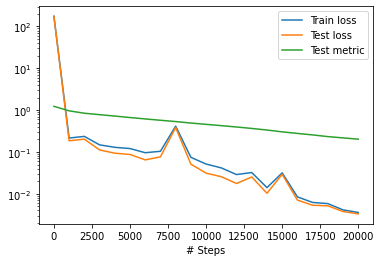

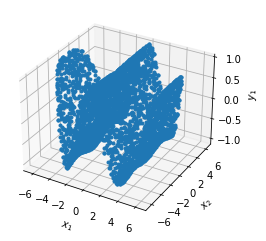

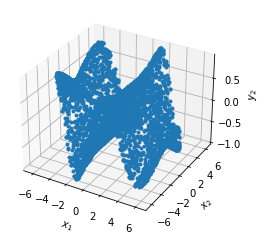

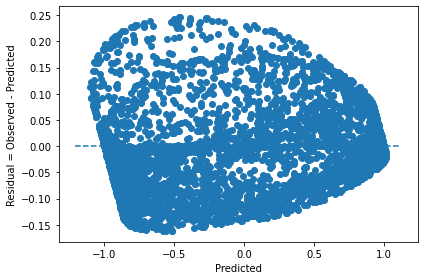

In [2]:
#geom = dde.geometry.Rectangle([0, 0], [dim_x, dim_x])
geom = dde.geometry.Disk([0,0], dim_x)
def pde(x, y):
    y0, y1 = y[:, 0:1], y[:, 1:2]
    
    y0_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    y0_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)

    y1_xx = dde.grad.hessian(y, x,component=1, i=0, j=0)
    y1_yy = dde.grad.hessian(y, x,component=1, i=1, j=1)

    return [-y0_xx - y0_yy - k0 ** 2 * y0,
            -y1_xx - y1_yy - k0 ** 2 * y1]

def sol(x):
    return np.exp(1j * k0 * x[:, 0:1])

def boundary(_, on_boundary):
    return on_boundary

def func0(x):
    result = np.exp(1j * k0 * x[:, 0:1])
    return np.real(result)

def func1(x):
    result = np.exp(1j * k0 * x[:, 0:1])
    return np.imag(result)

bc0 = dde.DirichletBC(geom, func0, boundary, component = 0)
bc1 = dde.DirichletBC(geom, func1, boundary, component = 1)

def func(x):
    real = np.real(np.exp(1j * k0 * x[:, 0:1]))
    imag = np.imag(np.exp(1j * k0 * x[:, 0:1]))
    return np.hstack((real, imag))

bcs = [bc0, bc1]
weights = [1, 1, 100, 100]

data = dde.data.PDE(geom, pde, bcs, num_domain= nx**2, num_boundary= 4 * nx, num_test= 10 * nx ** 2, solution = func)
net = dde.maps.FNN([2] + [50] * 4 + [2], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001, loss_weights= weights, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

#model.compile("L-BFGS")
#losshistory, train_state = model.train()

Relative error =  0.21822446001585266


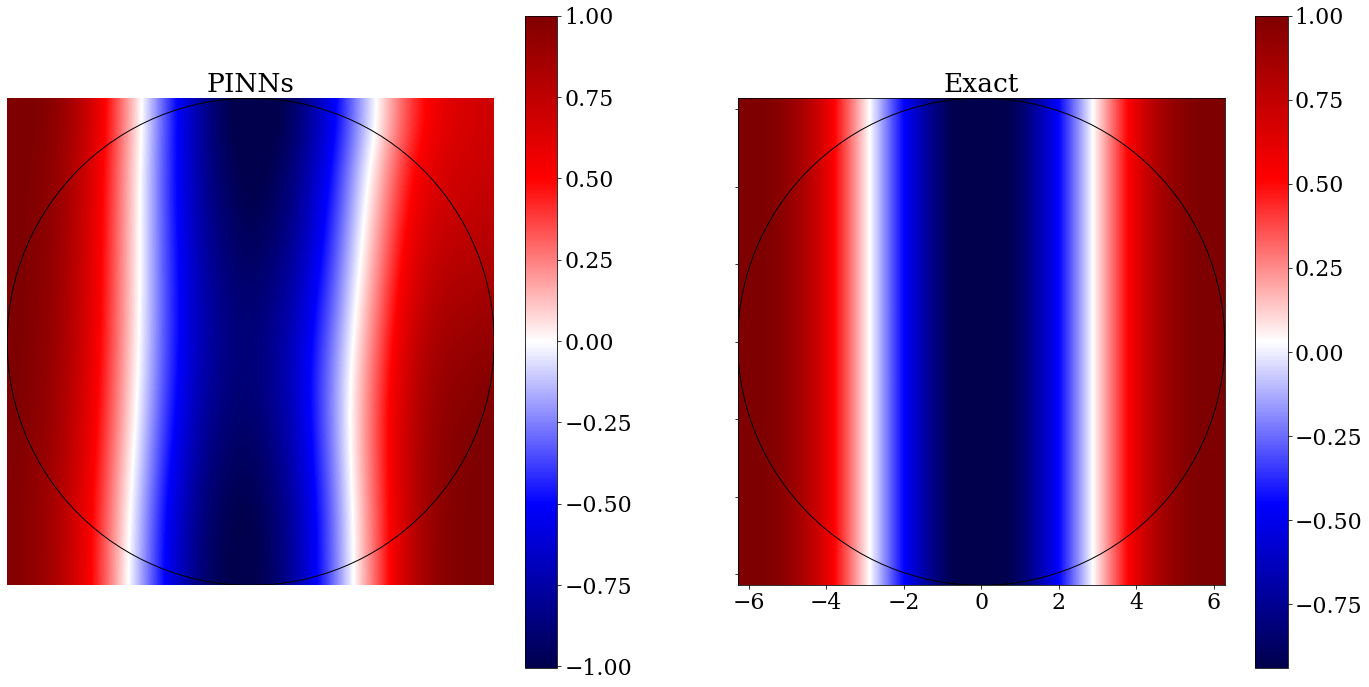

In [3]:

'''            Evaluate field over a specified grid of points              '''
# Square grid with 10 points per wavelength in each direction
Nx = int(np.ceil(dim_x/wave_len * 10))
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [0, dim_x, 0, dim_x]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

points_2d = points[:2, :]

#in_circ = points[0, :]**2 + points[1, :]**2 <= (radius)**2
#in_circ_2d = points_2d[0, :]**2 + points_2d[1, :]**2 <= (radius)**2
#points[0, in_circ] = -radius - wave_len / 10
#points[1, in_circ] = radius + wave_len / 10
#points[2, in_circ] = 0.

# Bounding box tree etc for function evaluations

u_sca = model.predict(points[:2, :].T)
u_sca = u_sca[:, 0] + 1j* u_sca[:, 1]
u_sca = u_sca.reshape((Nx, Ny))

'''                  Compare against analytical solution                    '''
# Uncomment to perform comparison, takes a few seconds to run

u_exact = sol(points.T)
u_exact = u_exact.reshape((Nx, Ny))
diff = u_exact-u_sca
error = np.linalg.norm(diff)/np.linalg.norm(u_exact)
print('Relative error = ', error)

'''                     Plot field and save figure                          '''
plt.rc('font', family='serif', size=22)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.real(u_sca)).T,
           extent=[-dim_x,dim_x,-dim_x,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')

ax1.axis('off')
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.real(u_exact)).T,
           extent=[-dim_x,dim_x,-dim_x,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')

#circle = plt.Circle((0., 0.), dim_x, color='black', fill=False)
circle = plt.Circle((0., 0.), dim_x, color='black', fill=False)
ax1.add_patch(circle)

circle = plt.Circle((0., 0.), dim_x, color='black', fill=False)
ax2.add_patch(circle)

#ax2.add_patch(circle)

#ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)


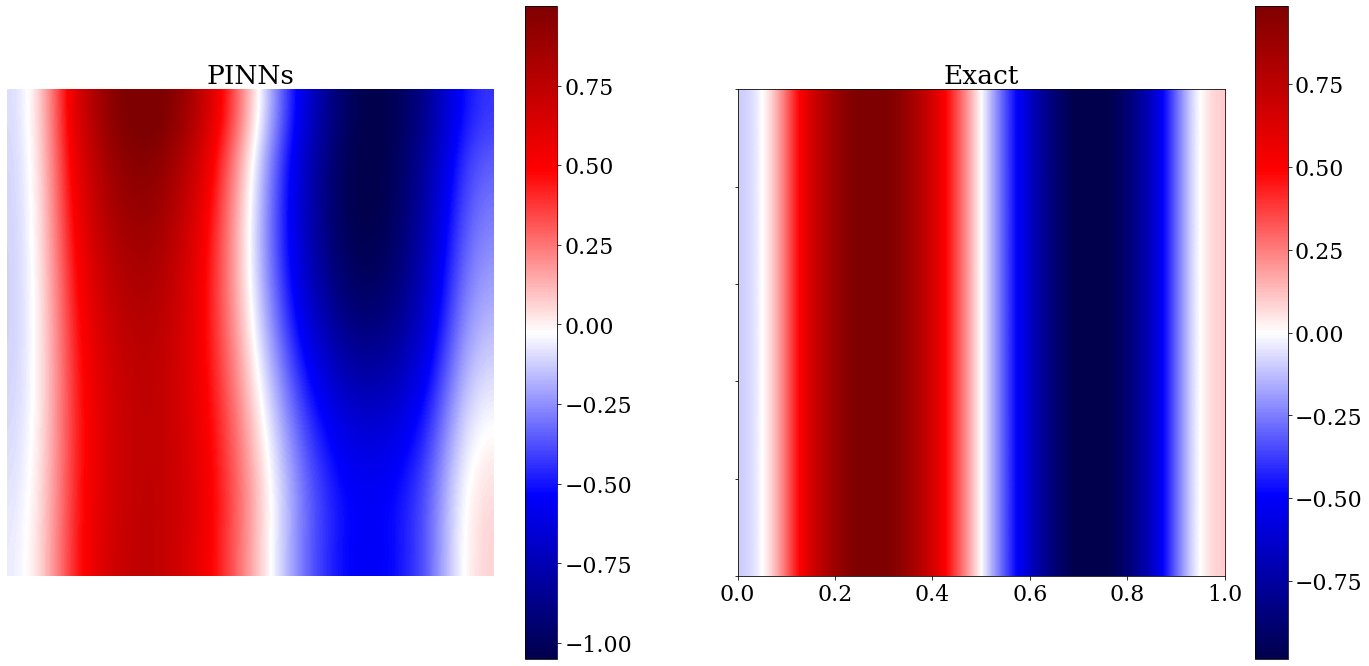

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.imag(u_sca)).T,
           extent=[0,1,0,1],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')


ax1.axis('off')
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.imag(u_exact)).T,
           extent=[0,1,0,1],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')

ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)
